In [1]:
import import_ipynb
from APS_system_package.data_clean import train_data_clean, test_data_clean
from APS_system_package.preprocessing import *
from APS_system_package.logistic_regressions import *
from APS_system_package.performance_measure import *
import seaborn as sns
sns.set()
import time

importing Jupyter notebook from C:\Users\shuxg\Desktop\EIT\Proj 4 - Logistic\APS_system_package\data_clean.ipynb
importing Jupyter notebook from C:\Users\shuxg\Desktop\EIT\Proj 4 - Logistic\APS_system_package\preprocessing.ipynb
importing Jupyter notebook from C:\Users\shuxg\Desktop\EIT\Proj 4 - Logistic\APS_system_package\logistic_regressions.ipynb
importing Jupyter notebook from C:\Users\shuxg\Desktop\EIT\Proj 4 - Logistic\APS_system_package\performance_measure.ipynb


In [2]:
def add_time2die(dataframe, drop_relative_columns = True):
    # please import the dataframe after
    #        using train_data_clean and test_data_clean functions.
    rel_cols = ['ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009',
                'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009',
                'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009',
                'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009',
                'cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009',
                'cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009',
                'ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009']
    
    for i in range(7):
        sum_up = np.sum(dataframe[rel_cols[i*10:(i+1)*10]], axis = 1)
        s = 'time2die_' + rel_cols[i*10][0:2]
        dataframe[s] = sum_up
    
    if drop_relative_columns:
        dataframe = dataframe.drop(rel_cols, axis = 1)
    
    return dataframe

## load train and test dataset

In [3]:
df_trn = train_data_clean('train.csv', impute = 'median')
df_val = test_data_clean('test.csv', 'train.csv', impute = 'median')

Nan: 0
Nan: 0
Nan: 0


**add distance**

In [4]:
df_trn = add_time2die(df_trn, drop_relative_columns = True)
df_val = add_time2die(df_val, drop_relative_columns = True)

In [5]:
df_trn.shape

(60000, 108)

**split based on class**

In [7]:
df_trn_pos = df_trn[df_trn['class'] == 1]
df_trn_neg = df_trn[df_trn['class'] == 0]
cols = df_trn_pos.columns[1:]

**recombine pos and neg**

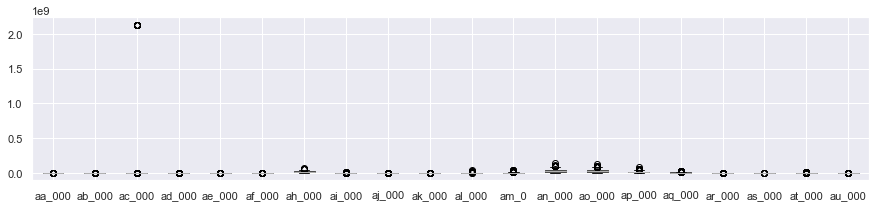

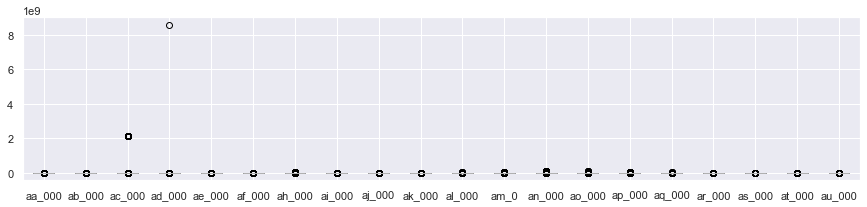

In [8]:
plt.figure(figsize = (15, 3))
df_trn_pos.boxplot(cols.tolist()[0:20])
plt.figure(figsize = (15, 3))
df_trn_neg.boxplot(cols.tolist()[0:20])

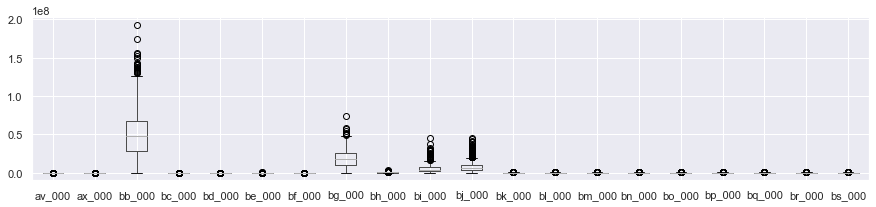

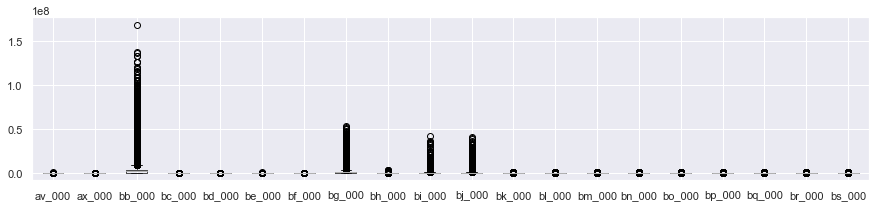

In [9]:
a, b = 20, 40
plt.figure(figsize = (15, 3))
df_trn_pos.boxplot(cols.tolist()[a:b])
plt.figure(figsize = (15, 3))
df_trn_neg.boxplot(cols.tolist()[a:b])

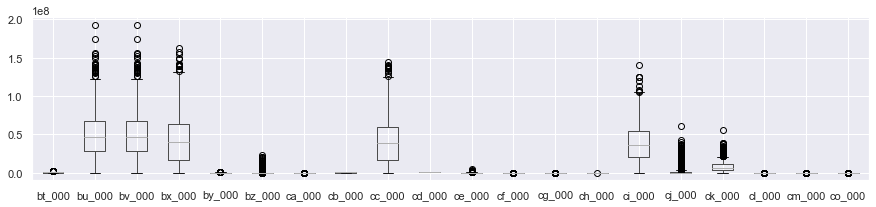

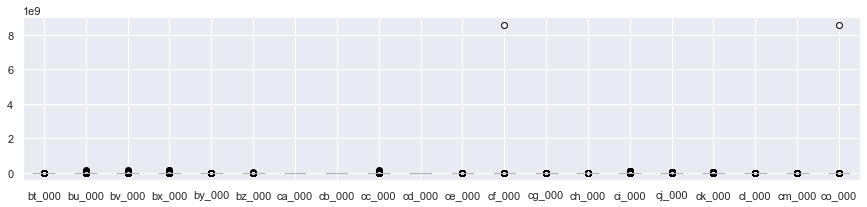

In [10]:
a, b = 40, 60
plt.figure(figsize = (15, 3))
df_trn_pos.boxplot(cols.tolist()[a:b])
plt.figure(figsize = (15, 3))
df_trn_neg.boxplot(cols.tolist()[a:b])

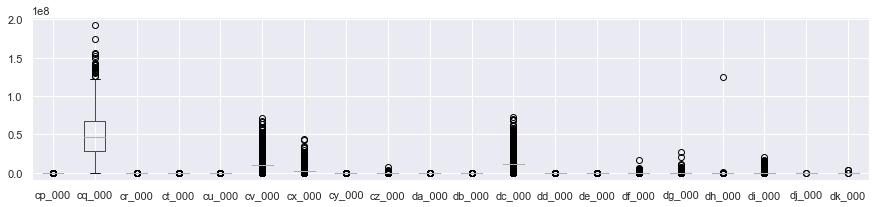

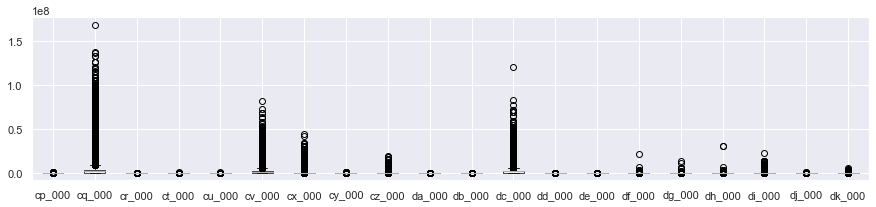

In [10]:
a, b = 60, 80
plt.figure(figsize = (15, 3))
df_trn_pos.boxplot(cols.tolist()[a:b])
plt.figure(figsize = (15, 3))
df_trn_neg.boxplot(cols.tolist()[a:b])

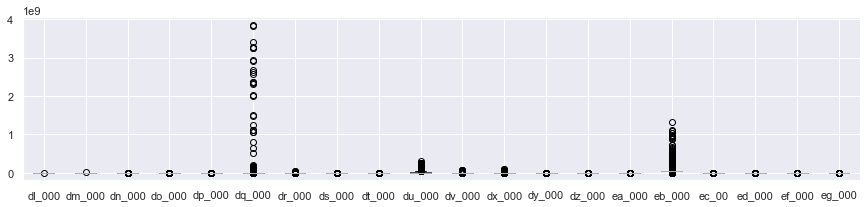

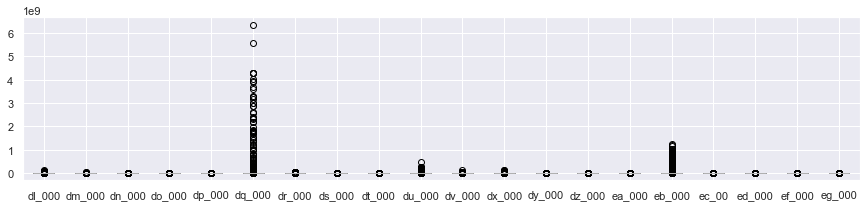

In [12]:
a, b = 80, 100
plt.figure(figsize = (15, 3))
df_trn_pos.boxplot(cols.tolist()[a:b])
plt.figure(figsize = (15, 3))
df_trn_neg.boxplot(cols.tolist()[a:b])

Text(0.5, 1.0, 'Negative Case')

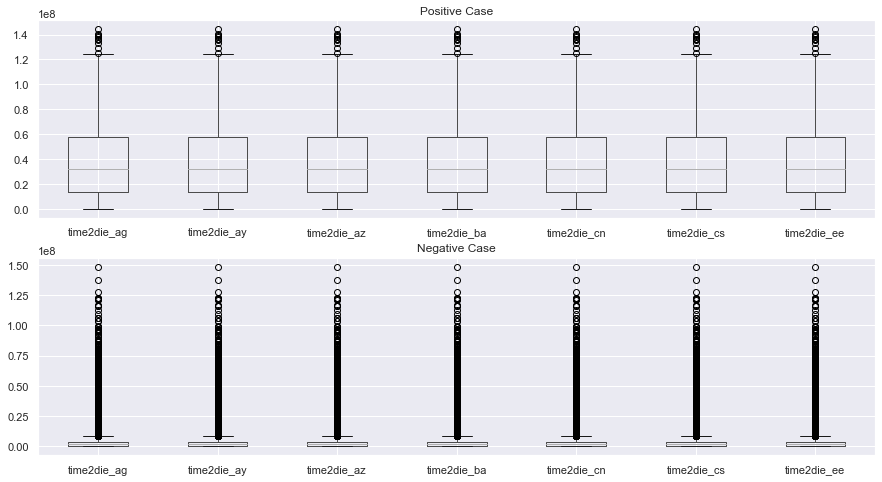

In [14]:
a, b = 100, 115
plt.figure(figsize = (15, 8))
plt.subplot(211)
df_trn_pos.boxplot(cols.tolist()[a:b])
plt.title('Positive Case', fontsize = 12)
plt.subplot(212)
df_trn_neg.boxplot(cols.tolist()[a:b])
plt.title('Negative Case', fontsize = 12)

**remove outliars**

In [8]:
neg_cols   = ['ad_000', 'cf_000', 'co_000', 'time2die_ag']
conditions = [8e9, 8e9, 8e9, 5e8]
for i in range(len(conditions)):
    df_trn_neg = df_trn_neg[df_trn_neg[neg_cols[i]] < conditions[i]]
df_trn_neg.shape

(58998, 108)

**save featured data**

In [13]:
df_trn = df_trn_pos.append(df_trn_neg, ignore_index = False)

In [14]:
df_trn.shape, df_val.shape

((59998, 108), (16000, 108))

In [15]:
df_trn.to_csv('cleaned_train_addTime2Die.csv', index = False)
df_val.to_csv('cleaned_test_addTime2Die.csv', index = False)